In [123]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

## Linear Regression 

In [70]:
df_reservatorio = pd.read_csv('clorofila.csv', sep=',')

In [71]:
df_reservatorio.head()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


In [72]:

X = df_reservatorio['pH']

Y = df_reservatorio['Clorofila']

In [73]:
X = sm.add_constant(X);

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
modelo_linear_ph  = sm.OLS(Y, X)

In [75]:
modelo_linear_ph = modelo_linear_ph.fit()

Intervalo de confiança

In [76]:
st, data, ss2 = summary_table(modelo_linear_ph, alpha=0.05)

In [77]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [78]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,59.97,25.795601644015488,0.5674522634637656,24.680769964838984,26.91043332319199,1.474762085648866,50.116441202382106,34.17439835598451,12.353332880854472,2.766411193286057,0.008074094855852386
2.0,30.59,19.81288532418871,0.7931036028635671,18.254733073734634,21.371037574642784,-4.532303637626935,44.15807428600435,10.77711467581129,12.340900372810538,0.8732843107262596,0.001574880018319022
3.0,17.06,18.65832603439757,0.8539723895677149,16.980589360618424,20.33606270817672,-5.694809030670719,43.01146109946586,-1.598326034397573,12.336837783417856,-0.1295571898129283,4.021360365680229e-05
4.0,38.0,21.912084032899855,0.693340415582922,20.549929170696895,23.274238895102815,-2.4213467367129304,46.245514802512645,16.087915967100145,12.346907078480411,1.3029915803885805,0.0026768861250256477
5.0,24.39,22.122003903770974,0.6843273427832958,20.777556362043597,23.46645144549835,-2.2104420551410087,46.45444986268296,2.2679960962290266,12.347409907524312,0.18368193112686299,5.181779533998715e-05
6.0,21.21,24.116242677046564,0.6100956228247726,22.917632729664785,25.314852624428344,-0.20858112410105534,48.44106647819419,-2.9062426770465635,12.35130028246097,-0.2352985200411224,6.754276775875898e-05
7.0,32.3,24.64104235422436,0.5945665083407576,23.472941314623938,25.809143393824783,0.31770279754278263,48.96438191090594,7.6589576457756365,12.35205756154293,0.620055210042183,0.0004454028551065237
8.0,27.23,27.684880481855533,0.5468660066533263,26.610493105619774,28.75926785809129,3.365861270852598,52.00389969285847,-0.45488048185553254,12.354261325845323,-0.03681972315932114,1.3281873250683567e-06
9.0,16.71,26.00552151488661,0.5636478339674706,24.898164118212346,27.112878911560873,1.6850234205859032,50.32601960918731,-9.295521514886609,12.353507050865119,-0.7524601294687117,0.0005893484425265354


In [79]:
fitted_values = data[:, 2]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T

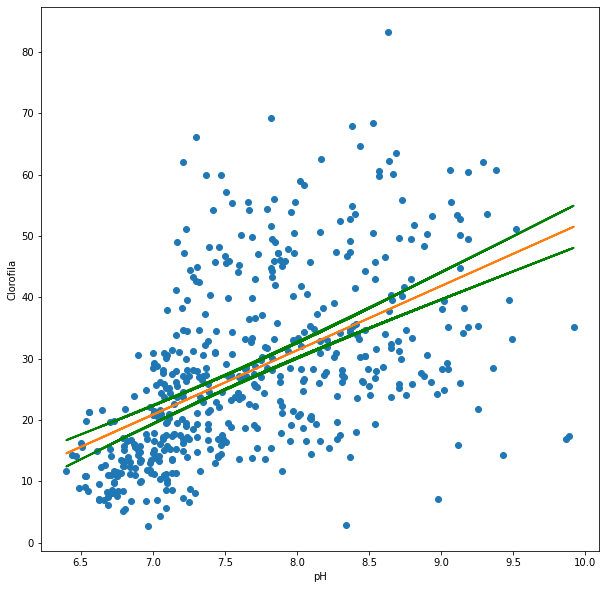

In [80]:
plt.figure(figsize=(10,10)) 

plt.plot(df_reservatorio['pH'], df_reservatorio['Clorofila'], 'o')
plt.plot(df_reservatorio['pH'], fitted_values, '-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_low, 'g-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_upp, 'g-', lw=2)
plt.xlabel('pH')
plt.ylabel('Clorofila')
plt.show()

## Mult Linear Regression

In [81]:
df_reservatorio = pd.read_csv('clorofila.csv')
x = df_reservatorio.drop(columns=['Clorofila'])
y = df_reservatorio['Clorofila']
x = sm.add_constant(x)

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [82]:
x

,const,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez
0,1.0,121.73,8.32,7.47,198.04,0.37,20.55,6.98
1,1.0,121.29,5.67,6.90,231.30,0.40,19.98,4.65
2,1.0,120.77,5.33,6.79,229.20,0.42,19.61,3.94
3,1.0,119.50,7.61,7.10,228.61,0.41,19.47,5.20
4,1.0,121.17,7.96,7.12,208.77,0.39,19.73,4.76
...,...,...,...,...,...,...,...,...
507,1.0,146.19,3.66,6.55,510.76,0.21,27.12,4.09
508,1.0,143.60,3.93,6.69,511.70,0.25,26.17,2.40
509,1.0,141.00,4.49,6.79,497.89,0.30,25.65,2.85
510,1.0,139.27,3.44,6.66,506.33,0.30,24.51,2.72


In [83]:
model_linear_multiple = sm.OLS(y,x)
model_linear_multiple = model_linear_multiple.fit()

In [84]:
print(model_linear_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.75e-74
Time:                        21:38:47   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916

In [85]:
st, data, ss2 = summary_table(model_linear_multiple, alpha=0.05)

In [86]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,59.97,23.391439665551538,1.1349664322676833,21.161591541623974,25.6212877894791,3.1109744263535575,43.67190490474952,36.57856033444846,10.196964212525476,3.58720101121048,0.019927172650244098
2.0,30.59,14.135904161511736,1.0357962875149371,12.100893836253428,16.170914486770045,-6.124064117990628,34.3958724410141,16.454095838488264,10.207514585082405,1.6119590818449399,0.003344465511117987
3.0,17.06,12.435348139119847,1.111514931256811,10.251574757180816,14.61912152105888,-7.840102875498777,32.71079915373847,4.624651860880151,10.199547171884294,0.45341737068762233,0.0003051934030045285
4.0,38.0,19.486695810073513,1.2362370888383096,17.057883049710195,21.91550857043683,-0.8166088245774112,39.79000044472444,18.513304189926487,10.18518265982895,1.8176703166006254,0.006084237197027973
5.0,24.39,21.15046828791424,1.2336667522329041,18.726705421622214,23.574231154206267,0.8477671352461513,41.45316944058233,3.2395317120857605,10.185494308001692,0.31805346055132494,0.00018549908154777187
6.0,21.21,21.96986985982468,1.1998347447494255,19.612576129773988,24.327163589875372,1.674996581277945,42.264743138371415,-0.7598698598246791,10.189535050196934,-0.07457355571979637,9.6385975726983e-06
7.0,32.3,24.1534994174293,1.1713590967309615,21.852151280575335,26.454847554283262,3.865048246639173,44.44195058821943,8.146500582570699,10.192847777751092,0.7992369512623203,0.0010545086690607148
8.0,27.23,26.709004829762296,1.2106760710068232,24.33041134112082,29.087598318403774,6.411646512810268,47.00636314671432,0.520995170237704,10.188252617843318,0.05113685239068895,4.615667393738177e-06
9.0,16.71,23.140288457528825,1.157716913750932,20.865742872062675,25.414834042994976,2.8548600597133706,43.42571685534428,-6.430288457528825,10.194406284895397,-0.6307663514506284,0.000641398483767333


### QQ Plot

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


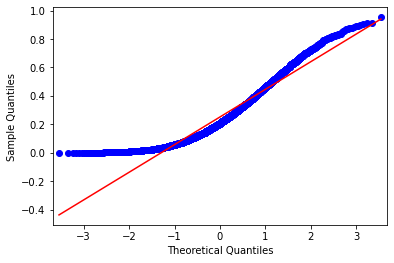

In [87]:
# QQ plot de uma distribuição não normal
non_normal_data = np.random.beta(1, 3, 5000)

# q-q plot
sm.qqplot(non_normal_data, line='s')
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


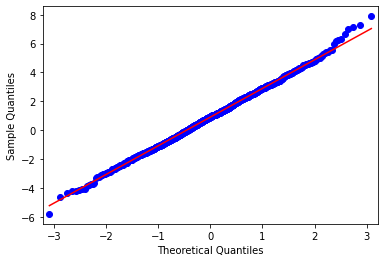

In [88]:
# QQ plot de uma distribuição normal de média 1 e desvio 2
normal_data= np.random.normal(loc=1, scale=2, size=1000)
# q-q plot
sm.qqplot(normal_data, line='s')
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


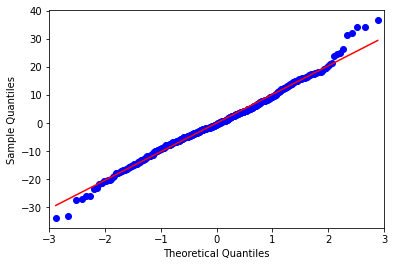

In [89]:
sm.qqplot(data[:,-4], line='s')
plt.show()

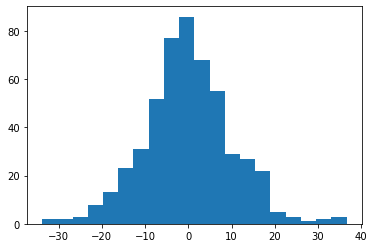

In [90]:
plt.hist(data[:,-4], 20);

### Shapiro Wilk

In [91]:
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print('p-valor: p=%.3f' % (p))
    # interpret
    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

In [92]:
# seed the random number generator
# generate univariate observations
# normality test
stat_normal, p_normal = shapiro_test(normal_data)

p-valor: p=0.749
A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0


In [93]:
stat_non_normal, p_non_normal = shapiro_test(non_normal_data)

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


### Box Cox 

In [94]:
# gerando distribuição
data = np.random.beta(1, 3, 5000)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


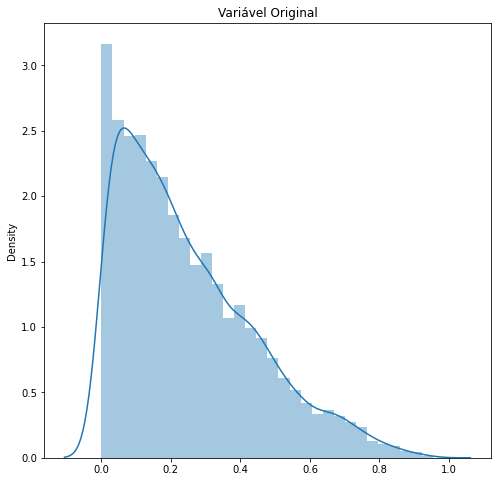

In [95]:
plt.figure(figsize = (8, 8))
sns.distplot(data)
plt.title('Variável Original')
plt.show()

In [96]:
# transformando os dados

transformed_data, lambda_found = scipy.stats.boxcox(data)

In [97]:
print(f'Melhor lambda: {lambda_found}')

Melhor lambda: 0.3991243460157737


c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


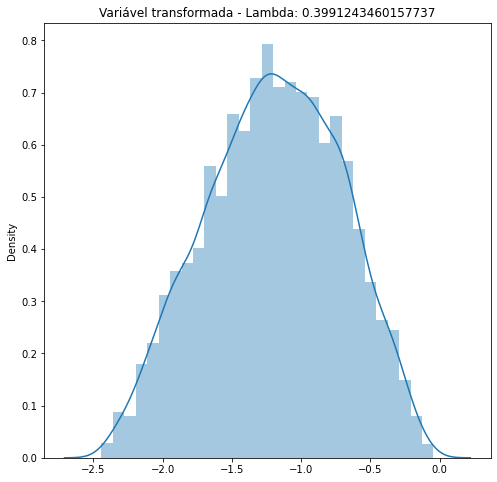

In [98]:
plt.figure(figsize = (8, 8))
sns.distplot(transformed_data)
plt.title(f'Variável transformada - Lambda: {lambda_found}')
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Inversão dos Dados')

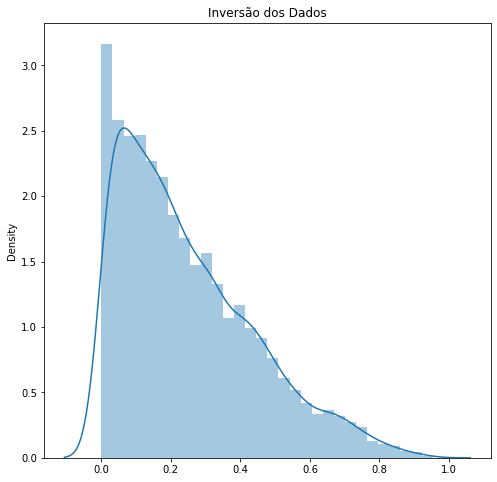

In [99]:
plt.figure(figsize=(8,8))
inverse_data = scipy.special.inv_boxcox(transformed_data, lambda_found)
sns.distplot(inverse_data)
plt.title('Inversão dos Dados')

In [100]:
np.mean(((inverse_data - data)/data))*100

8.331672233476609e-16

### Yeo-Jhonson

In [101]:
data1 = np.random.beta(1, 2, 5000)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


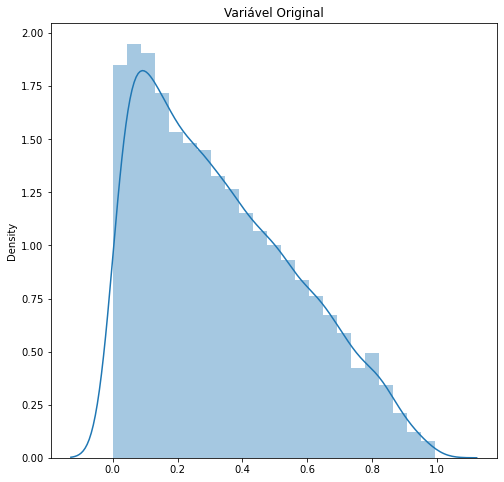

In [102]:
plt.figure(figsize = (8, 8))
sns.distplot(data1)
plt.title('Variável Original')
plt.show()

In [105]:
# transformando os dados

transformed_data_yeo, lambda_found_yeo = scipy.stats.yeojohnson(data1)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


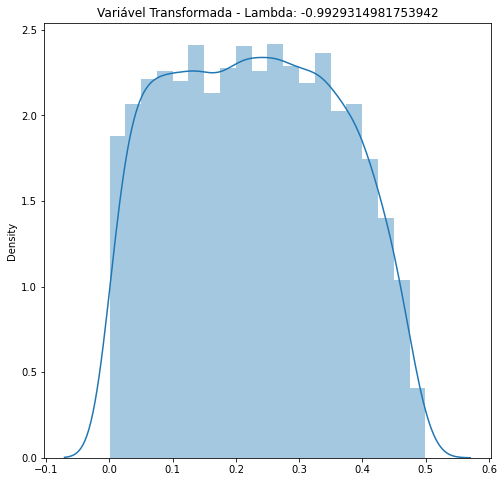

In [106]:
plt.figure(figsize = (8, 8))
sns.distplot(transformed_data_yeo)
plt.title(f'Variável Transformada - Lambda: {lambda_found_yeo}')
plt.show()

## Logistic Regression

In [108]:
df_diabetes = pd.read_csv('diabetes.csv')

In [109]:
df_diabetes['class'].value_counts(normalize=True)

tested_negative    0.651042
tested_positive    0.348958
Name: class, dtype: float64

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

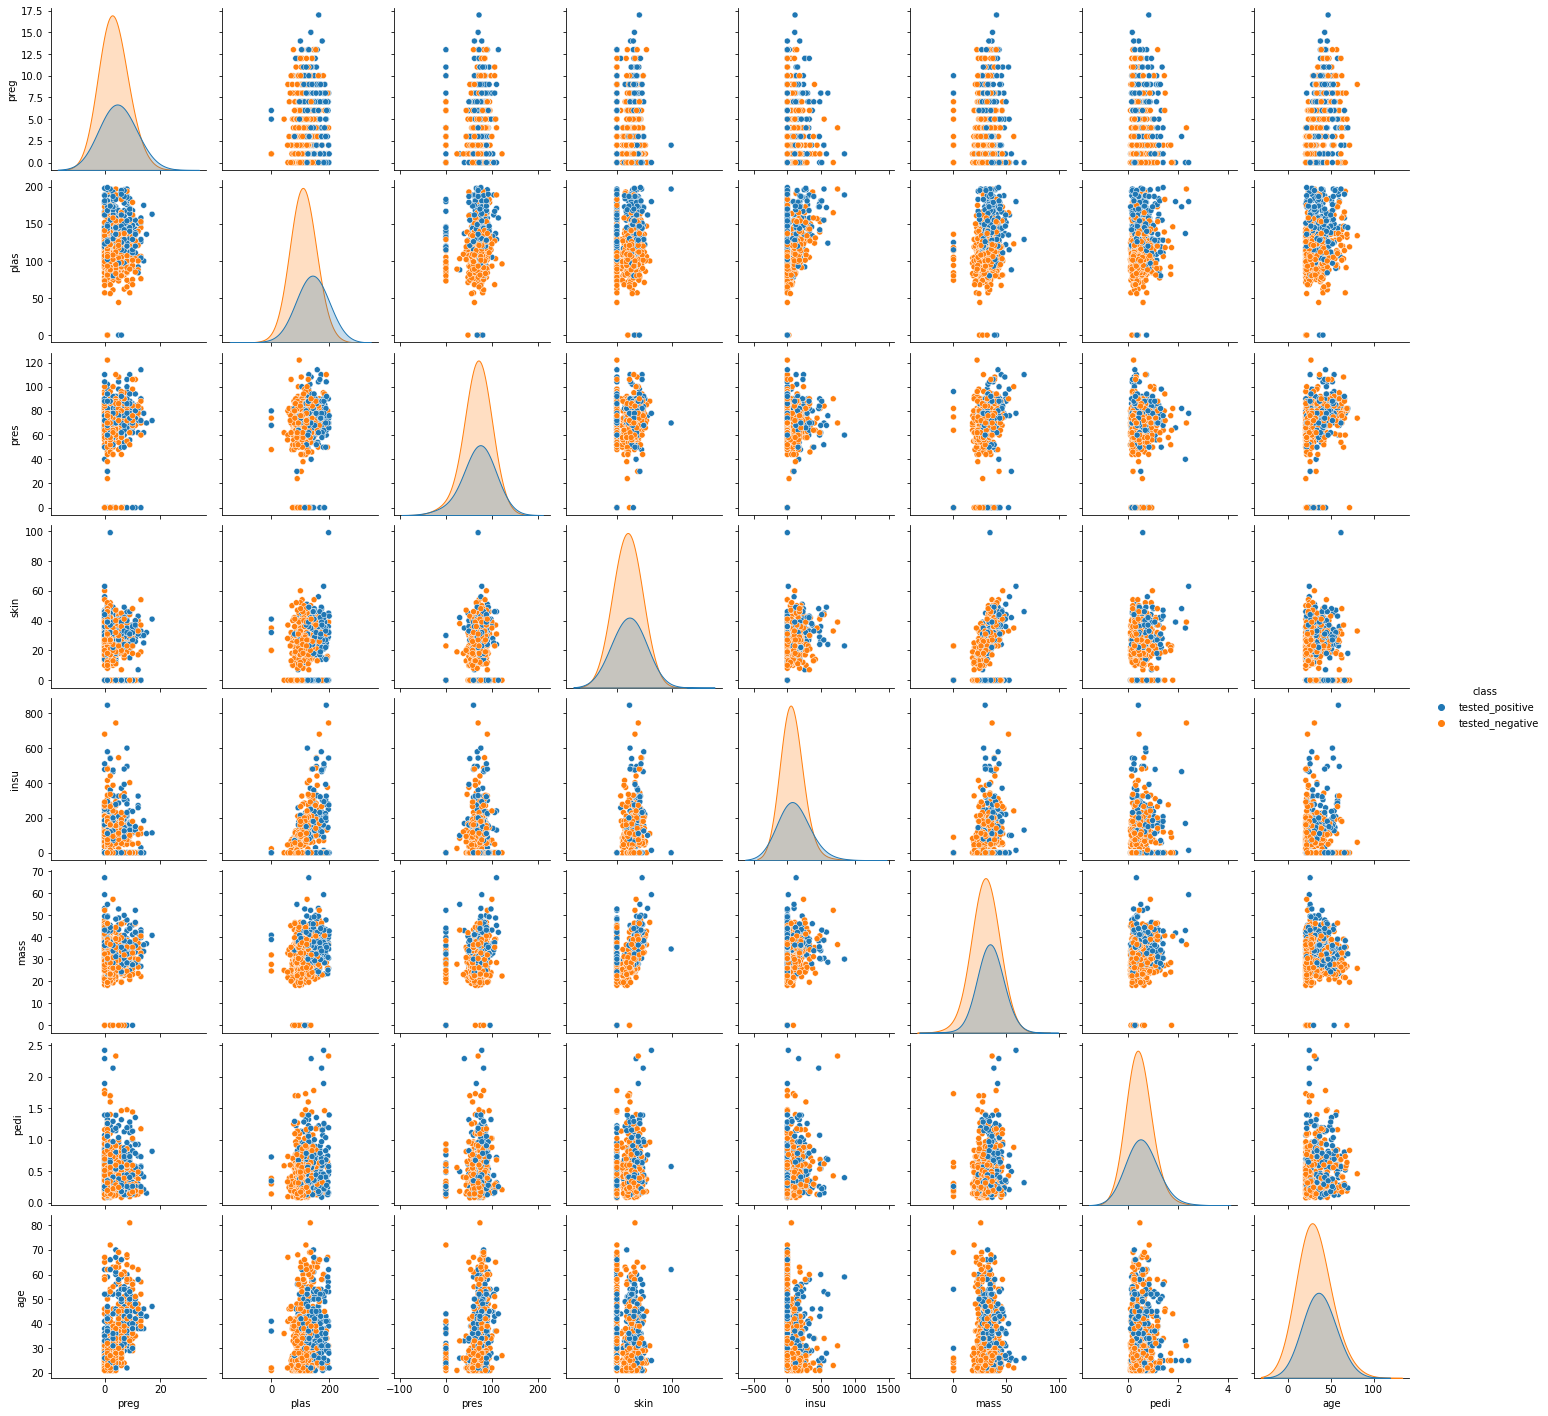

In [110]:
sns.pairplot(data=df_diabetes,hue='class', diag_kind='kde',diag_kws={'bw':1.5})
plt.show()

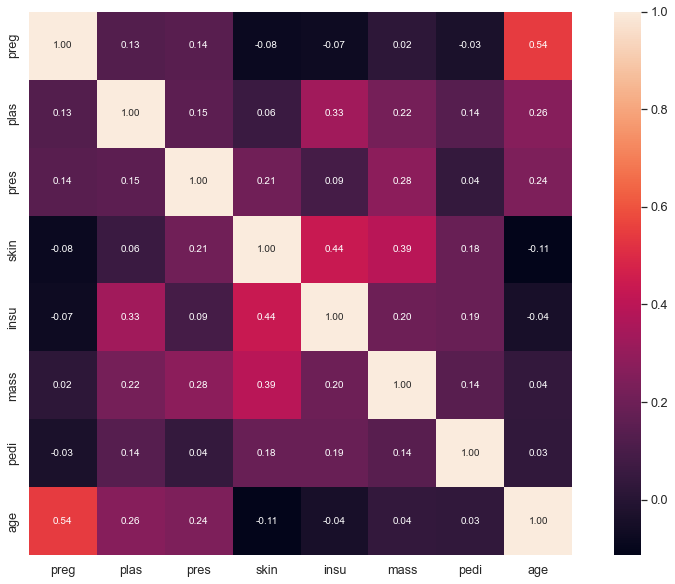

In [111]:
corrmat = df_diabetes.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [112]:
df_diabetes.replace({'tested_positive':1, 'tested_negative':0}, inplace=True)

In [113]:
df_diabetes.rename(columns={'class':'diabetes'}, inplace=True)

In [126]:
function_formula = 'diabetes ~ preg + plas + pres + skin + insu + mass + pedi + age'
reg_log = smf.logit(formula=function_formula, data=df_diabetes)
reg_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [115]:
print(reg_log.summary())

                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.2718
Time:                        22:04:10   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4047      0.717    -11.728      0.000      -9.809      -7.000
preg           0.1232      0.032      3.840      0.000       0.060       0.186
plas           0.0352      0.004      9.481      0.0

### Métricas

In [127]:
Y_real = df_diabetes['diabetes']
X = df_diabetes.drop('diabetes', axis=1)

In [128]:
threshold = 0.5
Y_previsoes_bool = reg_log.predict(X) >= threshold

Acurácia

In [129]:
accuracy_score(Y_real, Y_previsoes_bool)

0.7825520833333334

Recall

In [130]:
recall_score(Y_real, Y_previsoes_bool)

0.582089552238806

Precision

In [131]:
precision_score(Y_real, Y_previsoes_bool)

0.7393364928909952

In [132]:
thresholds = np.arange(0, 1, 0.01)

In [133]:
recall = []
precision = []

In [134]:
Y_previsoes = reg_log.predict(X)

In [135]:
for i in thresholds:
    Y_predict_bool_aux = Y_previsoes >= i
    recall.append(recall_score(Y_real, Y_predict_bool_aux))
    precision.append(precision_score(Y_real, Y_predict_bool_aux))

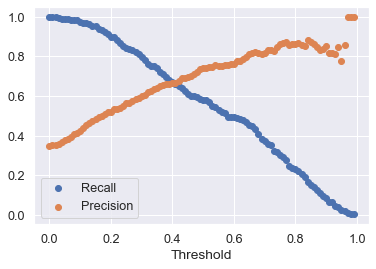

In [136]:
plt.scatter(thresholds, recall, label='Recall')
plt.scatter(thresholds, precision,label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()

## Regularization

### Linear Regularization 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/water_large.csv')

In [4]:
from collections import namedtuple
Curve = namedtuple('Curve', ['xs', 'ys'])

def flatten(seq): return [item for subseq in seq for item in subseq]

def make_curve(clf, x_start=-50, x_end=50):
    xs = np.linspace(x_start, x_end, num=100)
    ys = clf.predict(xs.reshape(-1, 1))
    return Curve(xs, ys)

def plot_data(df=df, ax=plt, **kwargs):
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50, **kwargs)

def plot_curve(curve, ax=plt, **kwargs):
    ax.plot(curve.xs, curve.ys, **kwargs)
    
def plot_curves(curves, cols=2, labels=None):
    if labels is None:
        labels = [f'Deg {deg} poly' for deg in degrees]
    rows = int(np.ceil(len(curves) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8),
                             sharex=True, sharey=True)
    for ax, curve, label in zip(flatten(axes), curves, labels):
        plot_data(ax=ax, label='Training data')
        plot_curve(curve, ax=ax, label=label)
        ax.set_ylim(-5e10, 170e10)
        ax.legend()
        
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top='off', bottom='off',
                    left='off', right='off')
    plt.grid(False)
    plt.title('Polynomial Regression')
    plt.xlabel('Water Level Change (m)')
    plt.ylabel('Water Flow (Liters)')
    plt.tight_layout()
    
def print_coef(clf):
    reg = clf.named_steps['reg']
    print(reg.intercept_)
    print(reg.coef_)

def coefs(clf):
    reg = clf.named_steps['reg']
    return np.append(reg.intercept_, reg.coef_)

def coef_table(clf):
    vals = coefs(clf)
    return (pd.DataFrame({'Coefficient Value': vals})
            .rename_axis('degree'))

In [5]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

degrees = [1, 2, 8, 12]
clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                  ('reg', LinearRegression())])
        .fit(X, y)
        for deg in degrees]

curves = [make_curve(clf) for clf in clfs]

ridge_clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                        ('reg', Ridge(alpha=0.1, normalize=True))])
        .fit(X, y)
        for deg in degrees]

ridge_curves = [make_curve(clf) for clf in ridge_clfs]

lasso_clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                        ('reg', LassoCV(normalize=True, precompute=True, tol=0.001))])
        .fit(X, y)
        for deg in degrees]
lasso_curves = [make_curve(clf) for clf in lasso_clfs]

c:\Users\georg\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


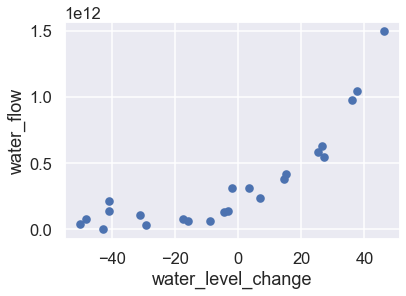

In [6]:
df.plot.scatter(0, 1, s=50);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


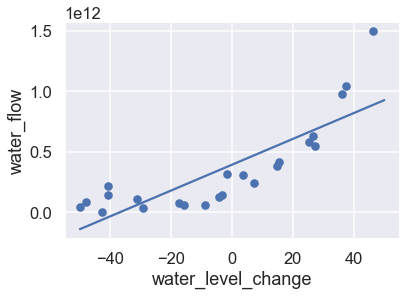

In [7]:
df.plot.scatter(0, 1, s=50);
plot_curve(curves[0])

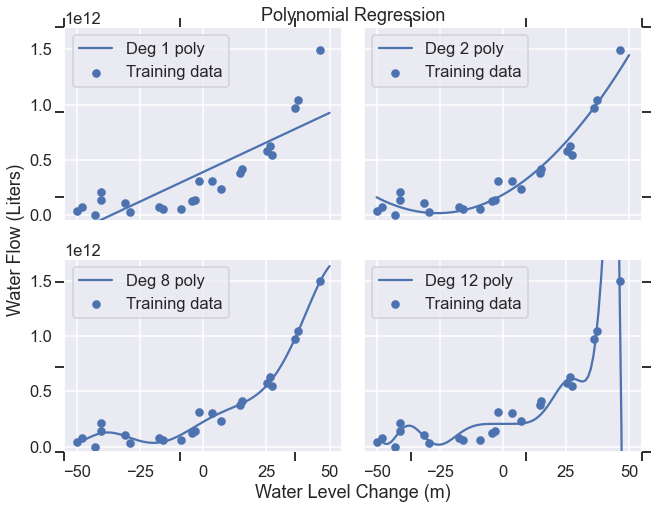

In [8]:
plot_curves(curves)

In [9]:
pd.DataFrame(clfs[2].named_steps['poly'].transform(X[:5]),
             columns=[f'deg_{n}_feat' for n in range(8)])

,deg_0_feat,deg_1_feat,deg_2_feat,deg_3_feat,deg_4_feat,deg_5_feat,deg_6_feat,deg_7_feat
0,-15.94,253.98,-4047.62,6.45e+04,-1.03e+06,1.64e+07,-2.61e+08,4.16e+09
1,-29.15,849.90,-24777.01,7.22e+05,-2.11e+07,6.14e+08,-1.79e+10,5.22e+11
2,36.19,1309.68,47396.85,1.72e+06,6.21e+07,2.25e+09,8.13e+10,2.94e+12
3,37.49,1405.66,52701.42,1.98e+06,7.41e+07,2.78e+09,1.04e+11,3.90e+12
4,-48.06,2309.65,-110999.13,5.33e+06,-2.56e+08,1.23e+10,-5.92e+11,2.85e+13


In [10]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values
print('X: ')
print(X)
print()
print('y: ')
print(y)

X: 
[[-15.94]
 [-29.15]
 [ 36.19]
 ...
 [  7.09]
 [ 46.28]
 [ 14.61]]

y: 
[6.04e+10 3.32e+10 9.73e+11 ... 2.36e+11 1.49e+12 3.78e+11]


In [11]:
X_poly_8 = PolynomialFeatures(degree=8, include_bias=False).fit_transform(X)
print(X_poly_8[0:2])

[[-1.59e+01  2.54e+02 -4.05e+03  6.45e+04 -1.03e+06  1.64e+07 -2.61e+08
   4.16e+09]
 [-2.92e+01  8.50e+02 -2.48e+04  7.22e+05 -2.11e+07  6.14e+08 -1.79e+10
   5.22e+11]]


In [12]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1.0, 10.0]

clf = RidgeCV(alphas=alphas, normalize=True).fit(X_poly_8, y)

clf.alpha_

c:\Users\georg\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


0.1

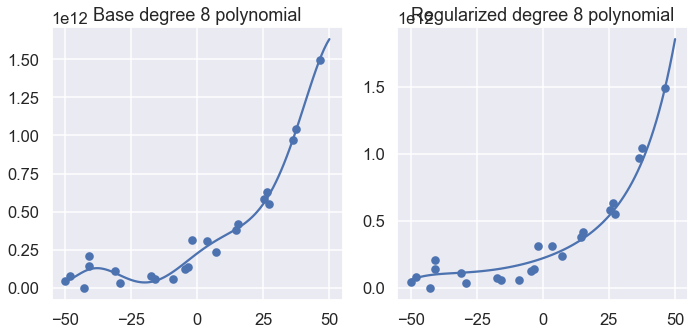

In [13]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot_data()
plot_curve(curves[2])
plt.title('Base degree 8 polynomial')

plt.subplot(122)
plot_data()
plot_curve(ridge_curves[2])
plt.title('Regularized degree 8 polynomial')
plt.tight_layout()

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
base = coef_table(clfs[2]).rename(columns={'Coefficient Value': 'Base'})
ridge = coef_table(ridge_clfs[2]).rename(columns={'Coefficient Value': 'Regularized'})

pd.options.display.max_rows = 20
display(base.join(ridge))
pd.options.display.max_rows = 7

,Base,Regularized
degree,,
0,225782507749.004,221063525725.229
1,13115217821.239,6846139065.959
2,-144725751.070,146158037.962
3,-10355083.222,1930090.040
4,567935.230,38240.624
5,9805.137,564.209
6,-249.636,7.252
7,-2.091,0.179
8,0.034,0.000


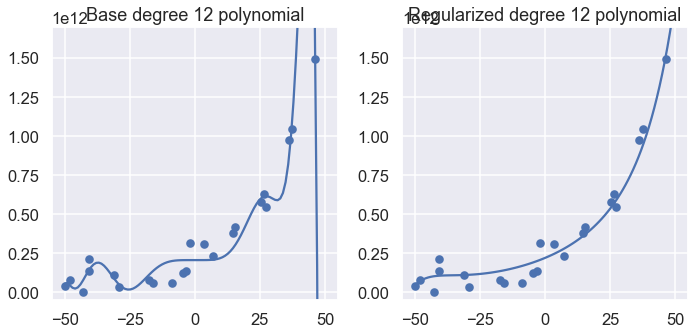

In [15]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot_data()
plot_curve(curves[3])
plt.title('Base degree 12 polynomial')
plt.ylim(-5e10, 170e10)

plt.subplot(122)
plot_data()
plot_curve(ridge_curves[3])
plt.title('Regularized degree 12 polynomial')
plt.ylim(-5e10, 170e10)
plt.tight_layout()

c:\Users\georg\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

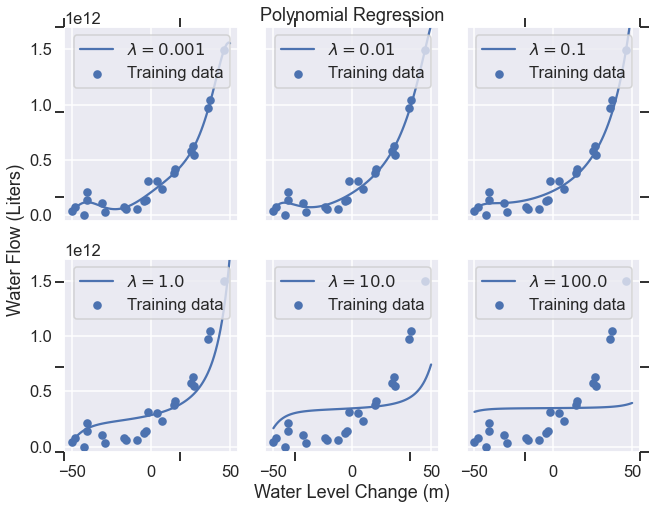

In [16]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

alpha_clfs = [Pipeline([
    ('poly', PolynomialFeatures(degree=12, include_bias=False)),
    ('reg', Ridge(alpha=alpha, normalize=True))]
).fit(X, y) for alpha in alphas]

alpha_curves = [make_curve(clf) for clf in alpha_clfs]
labels = [f'$\\lambda = {alpha}$' for alpha in alphas]

plot_curves(alpha_curves, cols=3, labels=labels)

### Lasso Regression 

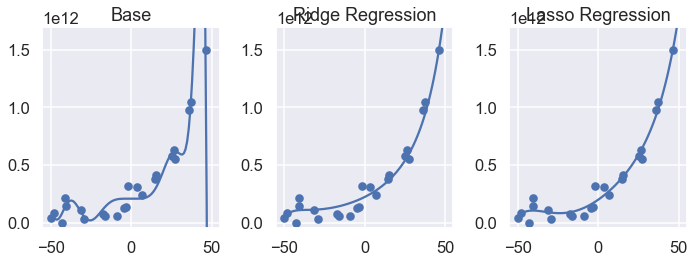

In [17]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(131)
plot_data()
plot_curve(curves[3])
plt.title('Base')
plt.ylim(-5e10, 170e10)

plt.subplot(132)
plot_data()
plot_curve(ridge_curves[3])
plt.title('Ridge Regression')
plt.ylim(-5e10, 170e10)

plt.subplot(133)
plot_data()
plot_curve(lasso_curves[3])
plt.title('Lasso Regression')
plt.ylim(-5e10, 170e10)
plt.tight_layout()

In [18]:
ridge = coef_table(ridge_clfs[3]).rename(columns={'Coefficient Value': 'Ridge'})
lasso = coef_table(lasso_clfs[3]).rename(columns={'Coefficient Value': 'Lasso'})

pd.options.display.max_rows = 20
pd.set_option('display.float_format', '{:.10f}'.format)
display(ridge.join(lasso))
pd.options.display.max_rows = 7
pd.set_option('display.float_format', '{:.2f}'.format)

,Ridge,Lasso
degree,,
0,221303288116.2429199219,197461304568.5902099609
1,6953405307.7654953003,9712897677.6165237427
2,142621063.9297247827,195271783.4490569532
3,1893283.0567886247,0.0000000000
4,38202.1520293691,37800.5376232634
5,484.4262914112,934.3307418244
6,8.1525126516,0.0000000000
7,0.1197232472,0.1046689492
8,0.0012506185,0.0000000000


### Splitter 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split